In [2]:
import importlib
import pubmedpy as pm
from article import Figure
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import pprint

from IPython.display import IFrame
import warnings
warnings.filterwarnings("ignore")

# PubMedPy
## structured parsing of ePMC XML full-text articles 

Scientific articles are available PDF format.


Millions of articles have been published and no human being can never hope to read even a small fraction of them.


Most of the scientific knowledge is beyond the reach of scientists

In [3]:
IFrame("data/btx590.pdf", width=1100, height=600)

*  PDF encodes for graphical elements
    * Perfect for editorial purposes (visual consistency)
    * Perfectly human-readable
    * **Garbage** for a machine

In 2003 NLM released the [Journal Publishing Tag Set Version 1.0](https://dtd.nlm.nih.gov/publishing/1.0/) that has now reached its [version 3.0](https://dtd.nlm.nih.gov/publishing/3.0/)

* It's an XML specification to regularize and control journal articles content

* Eurore PMC stores all of its articles in XMLs compiled following these specifications

## 4.5 millions full text articles
At the time of writing ePMC allows bulk download of more than 4 million full-text articles

## The Problem

The tag set encodes the possible elements a small amount of costraints

This means:
* An article can have elements arbitrarily ordered
* An article can have elements (almost) arbitrarily nested

The tag set is similar to lego pieces. It defines some rules on how to combine the elements

![legopieces](data/lego-pieces.png)

But the number and complexity of possible combinations is infinite.

![legoexamples](data/lego-examples.png)

Hierarchy of Journal tag set 2.3 in a directed graph

![hierarchy](data/hierarchy_network.png)

A detail

![networkdetail](data/hierarchy_network_detail.png)

## PubMedPy
Allows to easily and consistently retrieve information from arbitrarily structred XML articles.

Retrieve an element regardless of its shape, orientation or position

![legoexamplehighlight](data/lego-examples_highlighted.png)

## Download articles
You can bulk download articles from script interface


![bulkdownload](data/bulkdownload.gif)

## Parse one XML article
When an XML file contains a single XML article you can safely use `parse_article()`.

This will transform the xml file in an `Article` object.

In [4]:
pm.parse_article("examples/example0.xml")

Article(journal=Intrapulmonary autologous transplant of bone marrow-derived mesenchymal stromal cells improves lipopolysaccharide-induced acute respiratory distress syndrome in rabbit, title=Journal(id='Crit Care', title='None'))

## Parse multiple articles in the same XML
Sometimes an XML file contains multiple `<article>` elements. Each corresponding to one manuscript. You can iteratively parse multiple articles residing in the same XML file using the `iter_articles()` function.

In [5]:
for article in pm.iter_articles('examples/example0.xml'):
    print(article)

Article(journal=Intrapulmonary autologous transplant of bone marrow-derived mesenchymal stromal cells improves lipopolysaccharide-induced acute respiratory distress syndrome in rabbit, title=Journal(id='Crit Care', title='None'))


For XML files containing a single `<article>`, using `iter_articles` or `parse_article` is equivalent. However if `parse_article` is used on an XML file containing multiple `<article>` elements, it will always parse only the first.

## Article objects
### Title
`Article`s have many methods that can be used to retrieve information. For example you can request their title:

In [6]:
article.get_title()

'Intrapulmonary autologous transplant of bone marrow-derived mesenchymal stromal cells improves lipopolysaccharide-induced acute respiratory distress syndrome in rabbit'

### Authors
You could also request the list of authors:

In [7]:
authors = article.get_authors()
authors

[Author(name=Name(pre='None' givenn='Mohammad Reza' surn='Mokhber Dezfouli' suf='None') email=mokhberd@ut.ac.ir affils=[Affiliation(id='Aff1' institution='Department of Internal Medicine, Faculty of Veterinary Medicine,  University of Tehran,  Tehran, Iran '), Affiliation(id='Aff3' institution='Institute of Biomedical Research,  University of Tehran,  Tehran, Iran ')]),
 Author(name=Name(pre='None' givenn='Massoumeh' surn='Jabbari Fakhr' suf='None') email=mjabbarifakhr@gmail.com affils=[Affiliation(id='Aff3' institution='Institute of Biomedical Research,  University of Tehran,  Tehran, Iran ')]),
 Author(name=Name(pre='None' givenn='Sirous' surn='Sadeghian Chaleshtori' suf='None') email=s.sadeghian@ut.ac.ir affils=[Affiliation(id='Aff1' institution='Department of Internal Medicine, Faculty of Veterinary Medicine,  University of Tehran,  Tehran, Iran '), Affiliation(id='Aff3' institution='Institute of Biomedical Research,  University of Tehran,  Tehran, Iran ')]),
 Author(name=Name(pre=

While `get_title` returns a string, `get_authors` as most methods returns Objects or list of Objects. This Objects will usually appear in the form:
```
ObjectName(someLabel=someInfo, ...)
```
However, these Objects will sometimes react differently when the `str()` function is called upon them or they may have attributes that can be directly accessed. For example the first element of `authors` is an `Author` object:

In [8]:
authors[0]

Author(name=Name(pre='None' givenn='Mohammad Reza' surn='Mokhber Dezfouli' suf='None') email=mokhberd@ut.ac.ir affils=[Affiliation(id='Aff1' institution='Department of Internal Medicine, Faculty of Veterinary Medicine,  University of Tehran,  Tehran, Iran '), Affiliation(id='Aff3' institution='Institute of Biomedical Research,  University of Tehran,  Tehran, Iran ')])

which have a public `name` attribute, which is, in turn, a `Name` object. Its `repr` looks like this:

In [9]:
authors[0].name

Name(pre='None' givenn='Mohammad Reza' surn='Mokhber Dezfouli' suf='None')

However, when printed it will look like this:

In [10]:
print(authors[0].name)

Mohammad Reza Mokhber Dezfouli


### Affiliations
`Article`s offer an endpoint to retrieve all affiliations of their authors

In [11]:
article.get_affiliations()

[Affiliation(id='Aff1' institution='Department of Internal Medicine, Faculty of Veterinary Medicine,  University of Tehran,  Tehran, Iran '),
 Affiliation(id='Aff3' institution='Institute of Biomedical Research,  University of Tehran,  Tehran, Iran '),
 Affiliation(id='Aff3' institution='Institute of Biomedical Research,  University of Tehran,  Tehran, Iran '),
 Affiliation(id='Aff1' institution='Department of Internal Medicine, Faculty of Veterinary Medicine,  University of Tehran,  Tehran, Iran '),
 Affiliation(id='Aff3' institution='Institute of Biomedical Research,  University of Tehran,  Tehran, Iran '),
 Affiliation(id='Aff2' institution='Department of Surgery and Radiology, Faculty of Veterinary Medicine,  University of Tehran,  Tehran, Iran '),
 Affiliation(id='Aff3' institution='Institute of Biomedical Research,  University of Tehran,  Tehran, Iran '),
 Affiliation(id='Aff2' institution='Department of Surgery and Radiology, Faculty of Veterinary Medicine,  University of Tehran

Sometimes `Affiliations`s are rather messy, so `Articles` offer a way to extract countries from their `institution` attribute. 

In [12]:
print(article.get_countries())

['Iran', 'Iran', 'Iran', 'Iran', 'Iran', 'Iran', 'Iran', 'Iran', 'Iran', 'Iran']


the `Article.get_countries()` method returns a flat list of countries, which can be used to produce plots like the one below (made in GSheet)

![countries](data/countries.png)

### Tables
`Article` objects provide a method to retrieve all tables in the body of the manuscript, which returns a list of `table` objects 

In [13]:
tables = article.get_tables()
tables

[Table(shape=(19, 11)), Table(shape=(34, 9))]

their default representation shows their dimension in (rows, cols) format.

In [14]:
table = tables[0]
table

Table(shape=(19, 11))

A `Table` object can be shown has a justified string with the `tabulate` method

In [15]:
print(table.tabulate())

Hematological parameters  Group      − 24 (h)           0 h               3 h                  6 h                 12 h                24 h                48 h                72 h               168 h            
WBC (/μl)                 Treatment  *8240 ± 1469.01    13,760 ± 890.50   *13,040 ± 1228.00    #*12,340 ± 1377.67  #10,740 ± 89.44     #9940 ± 54.77       9580 ± 396.23       9240 ± 1163.18     8700 ± 1437.01   
WBC (/μl)                 Control    *7720 ± 810.55     13,160 ± 522.49   *13,020 ± 756.30     *12,520 ± 589.06    *12,720 ± 1151.95   *12,620 ± 630.07    *12,640 ± 702.13    *12,380 ± 690.65   *11,740 ± 1040.67
SEG (/μl)                 Treatment  *2582 ± 937.64     8355.20 ± 885.64  #*7468.80 ± 1351.25  #*6441.60 ± 279.25  #5814 ± 541         #5098 ± 84.81       #3828.20 ± 246.90   3653.80 ± 205.11   3156.40 ± 1657.72
SEG (/μl)                 Control    *2550.20 ± 843.41  8467.60 ± 992.59  *8512.20 ± 599.36    *8101.20 ± 954.74   *7826.60 ± 1288.89  *7739.80 ± 1000.2

but it also contains raw data in its `rows` attribute, which stores a `table` as a 2d listimport warnings
warnings.filterwarnings("ignore") in which the first dimension contains the rows and the second dimension contains the columns.

In [16]:
table.rows

[['Hematological parameters',
  'Group',
  '−\u200924 (h)',
  '0\u2009h',
  '3 h',
  '6 h',
  '12 h',
  '24 h',
  '48 h',
  '72 h',
  '168\u2009h'],
 ['WBC (/μl)',
  'Treatment',
  '*8240\u2009±\u20091469.01',
  '13,760\xa0±\xa0890.50',
  '*13,040\u2009±\u20091228.00',
  '#*12,340\u2009±\u20091377.67',
  '#10,740\u2009±\u200989.44',
  '#9940\u2009±\u200954.77',
  '9580\u2009±\u2009396.23',
  '9240\u2009±\u20091163.18',
  '8700\u2009±\u20091437.01'],
 ['WBC (/μl)',
  'Control',
  '*7720\u2009±\u2009810.55',
  '13,160\xa0±\xa0522.49',
  '*13,020\u2009±\u2009756.30',
  '*12,520\u2009±\u2009589.06',
  '*12,720\u2009±\u20091151.95',
  '*12,620\u2009±\u2009630.07',
  '*12,640\u2009±\u2009702.13',
  '*12,380\u2009±\u2009690.65',
  '*11,740\u2009±\u20091040.67'],
 ['SEG (/μl)',
  'Treatment',
  '*2582\u2009±\u2009937.64',
  '8355.20\xa0±\xa0885.64',
  '#*7468.80\u2009±\u20091351.25',
  '#*6441.60\u2009±\u2009279.25',
  '#5814\u2009±\u2009541',
  '#5098\u2009±\u200984.81',
  '#3828.20\u2009±\u2

This means that the `rows` attribute can be directly read into a `pandas.DataFrame`

In [21]:
df = pd.DataFrame(table.rows[1:])
df.columns = table.rows[0]
df = df.set_index(table.rows[0][:2])
df

− 24 (h)               0 h  \
Hematological parameters Group                                            
WBC (/μl)                Treatment    *8240 ± 1469.01   13,760 ± 890.50   
                         Control       *7720 ± 810.55   13,160 ± 522.49   
SEG (/μl)                Treatment     *2582 ± 937.64  8355.20 ± 885.64   
                         Control    *2550.20 ± 843.41  8467.60 ± 992.59   
BAND (/μl)               Treatment       27.4 ± 26.43        73 ± 56.74   
                         Control         34.8 ± 32.42      73.2 ± 57.99   
LYM (/μl)                Treatment    5173.4 ± 577.66   3363.4 ± 900.92   
                         Control     4852.4 ± 1214.24   3175.6 ± 882.11   
MON (/μl)                Treatment          86 ± 5.47        76 ± 60.76   
                         Control            76 ± 4.18         68 ± 8.36   
RBC (×106/μl)            Treatment        6.11 ± 0.21       6.23 ± 0.90   
                         Control          6.07 ± 0.09       6.21 ± 1.11   
Hgb (g/dl)               Treatment       12.12 ± 0.44      12.44 ± 0.56   
                         Control            12 ± 0.18      12.22 ± 1.46   
Hct (%)                  Treatment       39.16 ± 2.24      40.66 ± 2.66   
                         Control          38.9 ± 2.54       40.4 ± 2.67   
Plt (×103/μl)            Treatment      371.2 ± 87.08       353 ± 74.24   
                         Control         339 ± 103.84    330.2 ± 111.21   

                                                    3 h                 6 h  \
Hematological parameters Group                                                
WBC (/μl)                Treatment    *13,040 ± 1228.00  #*12,340 ± 1377.67   
                         Control       *13,020 ± 756.30    *12,520 ± 589.06   
SEG (/μl)                Treatment  #*7468.80 ± 1351.25  #*6441.60 ± 279.25   
                         Control      *8512.20 ± 599.36   *8101.20 ± 954.74   
BAND (/μl)               Treatment         71.6 ± 66.72          64 ± 58.99   
                         Control           77.6 ± 49.88        86.2 ± 52.50   
LYM (/μl)                Treatment     3480.4 ± 1197.64       3758 ± 664.16   
                         Control         3268 ± 1603.72       3376 ± 813.13   
MON (/μl)                Treatment          80 ± 109.54         78 ± 174.41   
                         Control             72 ± 97.31          78 ± 83.18   
RBC (×106/μl)            Treatment          6.28 ± 0.78         6.28 ± 0.67   
                         Control            6.27 ± 0.91         6.29 ± 1.09   
Hgb (g/dl)               Treatment         12.56 ± 1.56        12.48 ± 1.16   
                         Control           12.52 ± 1.86        12.72 ± 1.97   
Hct (%)                  Treatment         40.58 ± 3.20        40.46 ± 2.36   
                         Control           40.68 ± 3.29         40.9 ± 4.04   
Plt (×103/μl)            Treatment          339 ± 80.56       347.6 ± 64.43   
                         Control          322.4 ± 78.15        322 ± 104.41   

                                                  12 h                24 h  \
Hematological parameters Group                                               
WBC (/μl)                Treatment     #10,740 ± 89.44       #9940 ± 54.77   
                         Control     *12,720 ± 1151.95    *12,620 ± 630.07   
SEG (/μl)                Treatment         #5814 ± 541       #5098 ± 84.81   
                         Control    *7826.60 ± 1288.89  *7739.80 ± 1000.22   
BAND (/μl)               Treatment          60 ± 56.56           58.8 ± 38   
                         Control          89.2 ± 57.47         102 ± 63.80   
LYM (/μl)                Treatment     3885.8 ± 606.60     4120.6 ± 743.79   
                         Control      3393.6 ± 1145.60    3471.8 ± 1196.61   
MON (/μl)                Treatment          76 ± 66.55         80 ± 123.28   
                         Control            84 ± 85.02         90 ± 108.39   
RBC (×106/μl)            Tr

Once casted in a `DataFrame`, data manipulation becomes extremely easy.

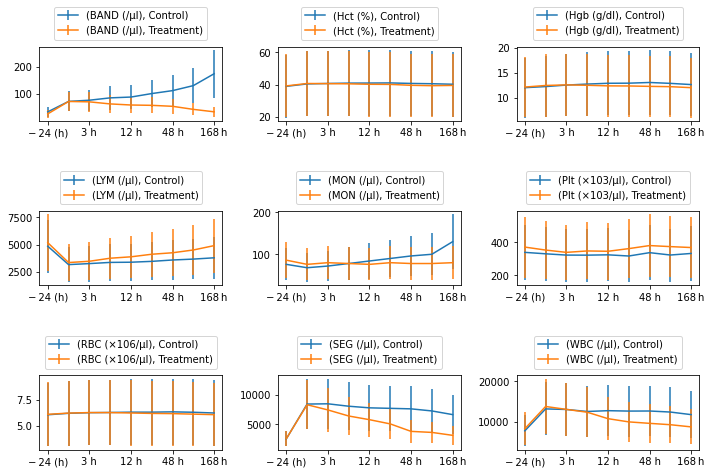

In [22]:
df = df.stack().str.replace('[\*#,]', '', regex=True).str.split('±', expand=True).unstack().astype(float)
fig, axes = plt.subplots(3,3, figsize=(10, 7))
for ax, lin, err in zip(axes.ravel(), df[0].T.groupby(level=0, axis=1), df[0].T.groupby(level=0, axis=1)):
    lines = lin[1].plot(ax=ax, yerr=err[1]/2)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.6))
fig.tight_layout()

### Body Content
An article body can come in all sort of shapes. To get a quick idea of the main sections of an `article` one can do:

In [19]:
article.get_body_structure(main_sections=True)

['Background',
 'Methods',
 'Results',
 'Discussion',
 'Conclusions',
 'Additional file']

To get the full body structure just omit the `main_sections` parameter

In [20]:
article.get_body_structure()

[('Background', []),
 ('Methods',
  ['Isolation, primary culture, and expansion of BM-MSCs',
   'Experimental design',
   'Analyses',
   'Imaging',
   'Sampling',
   'Histopathology',
   'Statistical analysis']),
 ('Results',
  ['Characterization of BMSCs',
   'Confirmation of ARDS experimental model',
   'Clinical and paraclinical findings after transplant of BM-MSCs in an experimental model of ARDS',
   'MSCs cause blood cells and BAL cells to balance',
   'Regulation of arterial blood gases with MSCs',
   'Effect of MSCs on arterial blood electrolytes',
   'Reduced levels of proinflammatory cytokines and increase in anti-inflammatory cytokine by MSCs',
   'Imaging findings',
   'Echocardiography findings',
   'Findings of gross pathology and histopathology']),
 ('Discussion', []),
 ('Conclusions', []),
 ('Additional file', ['Section'])]

Body elements can be arbitrarily nested. Some people might find useful to retrieve the content in its original nesting. This is possible through the `article.get_nested()` method.

In [21]:
article.get_nested_content()

[('Background',
  [('Paragraph1',
    [Text(Lung disorders have significant morbidity and mortality rates worldwide, both in humans and in animals. Acute respiratory distress syndrome (ARDS) is one of the leading causes of respiratory failure around the world. Although early diagnosis, timely medical care, and treatment may lead to improvement of symptoms, the signs return after a period of time. Causes of ARDS are different. It can be caused by direct or indirect damage to the lung epithelium. ARDS is described by severe hypoxemia, decreased pulmonary compliance, diffuse alveolar damage, and bilateral pulmonary infiltrates after cardiac edema [),
     ReferencedContent(href=None, text=1),
     Text(, ),
     ReferencedContent(href=None, text=2),
     Text(] and confirmed by a combination of clinical, physiological, and chest imaging parameters. Pulmonary inflammation with disruption of the mechanism of the alveolar–capillary barrier is an important direct cause of ARDS [),
     Refere

One of the most useful features is the possibility to retrieve a flattened version of the body contents. `article.get_flat_content()` will return a flat list of body objects, while `article.get_flat_text()` retruns a flat list of the text contained in the body.

In [23]:
''.join(article.get_flat_text())

'Lung disorders have significant morbidity and mortality rates worldwide, both in humans and in animals. Acute respiratory distress syndrome (ARDS) is one of the leading causes of respiratory failure around the world. Although early diagnosis, timely medical care, and treatment may lead to improvement of symptoms, the signs return after a period of time. Causes of ARDS are different. It can be caused by direct or indirect damage to the lung epithelium. ARDS is described by severe hypoxemia, decreased pulmonary compliance, diffuse alveolar damage, and bilateral pulmonary infiltrates after cardiac edema [1, 2] and confirmed by a combination of clinical, physiological, and chest imaging parameters. Pulmonary inflammation with disruption of the mechanism of the alveolar–capillary barrier is an important direct cause of ARDS [3, 4]. Therapeutic approaches include mechanical ventilation, neuromuscular blocking agents, fluid management, drug and antimicrobial therapy, and prone positioning [3

You can get content from one single section

In [25]:
''.join(article.get_flat_text(sections=['Conclusions']))

'Many studies on cell-based therapies in ARDS have been done, but most of them focused on molecular and signal tests. Although these studies could clear pathways, they are still far from tissue function. In this study, we tried to explain the MSCs’ effects on organ function. We investigated effects of BM-MSCs in an experimental model of ARDS and confirmed that MSCs decrease inflammation and improve alveolar fluid clearance and have a protective role in ARDS. Improvement in clinical signs, the decrease of inflammatory cells in blood and BAL, the balance in blood gases and cytokines, the decrease in the Hounsfield units, no changes in echocardiographic parameters. and the reduction of pulmonary hemorrhage and edema in pathology were observed. Despite these results, subsequent studies are required to confirm the decrease in inflammation, and physiological parameters over the long term and many experiments should be performed until stromal cell therapy is validated as a method of routine c

or from a set of sections

In [28]:
print(''.join(article.get_flat_text(sections=['Results', 'Discussion', 'Conclusions'])))

The plastic adherent BM-MSCs proliferated 5–7 days after seeding and reached 80% confluence about 2 weeks later. After three passages, the adherent cells were observed by microscopy to display homogeneous spindle fibroblast-like morphology (Additional file 1: Figure S1).Flow cytometric analysis demonstrated that cultured BM-MSCs expressed a particular pattern of cell surface markers of CD29 and CD90, 92% and 89%, respectively, but were uniformly negative for CD34 and CD45 (Additional file 1: Figure S2), which indicates cultured adherent cells were MSCs with high purity. Thus, the pure MSCs whose immunophenotype was confirmed were used in this study.Multilineage differentiation ability of BM-MSCs to engage in osteogenic and adipogenic differentiation in vitro confirmed potential pluripotent MSCs, and their ability to form osteoblasts and adipocytes when incubated in differentiation medium was retained (Additional file 1: Figure S3).Twenty-four hours after the intrapulmonary administrati

![uml](data/classes.png)